titanic 데이터셋

import seaborn as sb   
titanic = sb.load_dataset('titanic')   
titanic['age'].fillna(titanic['age'].mean(), inplace=True )   
특성데이터:,탑승등급(pclass),성별(sex), 나이(age), 탑승금액(fair)   
타겟:survived   

1) 상관관계 와 heatmap 그리시요   
2) 정규화하시요   
3) train test 셋으로 나누시요   
3) 딥러닝으로 학습하시요(학습시 정확도 출력)   
4) cost에대한 hist를 라인차트로 그리시요   
5) confusion matrix 와 heat map 그리시요   
6) train, test set f1 score 를 구하시요   
7) 1등급, 여성, 32세, 65달러인경우 생존여부를 예측하시요   

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score

import seaborn as sb

In [2]:
titanic = sb.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True )
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### sex 컬럼: text to value 변환 
male: 1 female: 0

In [4]:
titanic['sex'] = titanic['sex'].apply(lambda v:0 if v=='male' else 1)

In [5]:
data = titanic[['pclass', 'sex', 'age', 'fare', 'survived']]
data

,pclass,sex,age,fare,survived
0,3,0,22.000000,7.2500,0
1,1,1,38.000000,71.2833,1
2,3,1,26.000000,7.9250,1
3,1,1,35.000000,53.1000,1
4,3,0,35.000000,8.0500,0
...,...,...,...,...,...
886,2,0,27.000000,13.0000,0
887,1,1,19.000000,30.0000,1
888,3,1,29.699118,23.4500,0
889,1,0,26.000000,30.0000,1


### 1) 상관관계 와 heatmap 그리시요   

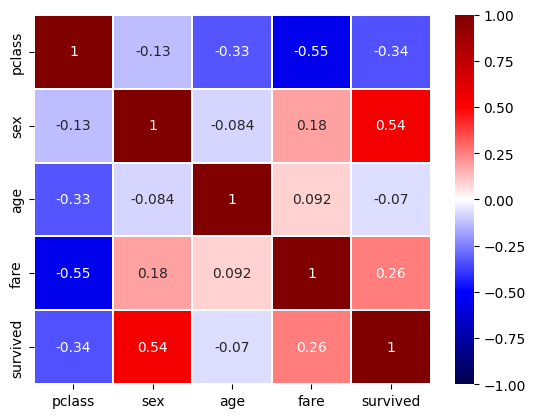

In [6]:
sb.heatmap( data.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [7]:
x_data = data.iloc[:,:-1].values
y_data = data[['survived']].values

In [8]:
x_data.shape

(891, 4)

In [9]:
y_data.shape

(891, 1)

### 2) 정규화하시요   

In [10]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

### 3) train test 셋으로 나누시요   

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_dataN, y_data, test_size=0.3, stratify=y_data)

### 4) 딥러닝으로 학습하시요(학습시 정확도 출력)   

In [12]:
x = torch.FloatTensor( x_train )
y = torch.FloatTensor( y_train )
print(x.shape)
print(y.shape)
feature_len = x.shape[1]
label_len = y.shape[1]
print('feature_len:', feature_len, ', label_len:', label_len)

torch.Size([623, 4])
torch.Size([623, 1])
feature_len: 4 , label_len: 1


In [13]:
class LogisticModel(nn.Module):
    def __init__(self, feat_len, label_len):
        super().__init__() # 초기화작업
        self.nn1 = Linear(feat_len, 20)
        self.nn2 = Linear(20, label_len)
        self.sig = Sigmoid()
        
    
    def forward(self, x):
        print('forward call')
#         x = self.nn1.forward(x)
        x = F.relu( self.nn1(x) ) # matmul(x, w1) + b1  w1:2x20
        x = self.sig( self.nn2(x) ) # matmul(x, w2) + b2  w2:20x1
        return x    

In [14]:
model = LogisticModel(feature_len, label_len)
loss_fn = torch.nn.BCELoss()
optimizer = Adam( model.parameters(), lr=0.01)

hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print('=====================')
    rdata = y.numpy()    
    pred = ((hx > 0.5) + 0).numpy()
    print('정확도',accuracy_score(rdata, pred))
    hist.append(cost.item())

forward call
정확도 0.38362760834670945
forward call
정확도 0.38362760834670945
forward call
정확도 0.38362760834670945
forward call
정확도 0.38362760834670945
forward call
정확도 0.6356340288924559
forward call
정확도 0.7736757624398074
forward call
정확도 0.7865168539325843
forward call
정확도 0.7319422150882825
forward call
정확도 0.7191011235955056
forward call
정확도 0.7158908507223114
forward call
정확도 0.7078651685393258
forward call
정확도 0.7030497592295345
forward call
정확도 0.7030497592295345
forward call
정확도 0.7078651685393258
forward call
정확도 0.7110754414125201
forward call
정확도 0.7174959871589085
forward call
정확도 0.7174959871589085
forward call
정확도 0.7191011235955056
forward call
정확도 0.7287319422150883
forward call
정확도 0.7399678972712681
forward call
정확도 0.7768860353130016
forward call
정확도 0.7881219903691814
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.78330658105939
forward call
정확도 0.7800963

정확도 0.7913322632423756
forward call
정확도 0.7913322632423756
forward call
정확도 0.7913322632423756
forward call
정확도 0.7913322632423756
forward call
정확도 0.7913322632423756
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7881219903691814
forward call
정확도 0.7881219903691814
forward call
정확도 0.7881219903691814
forward call
정확도 0.7881219903691814
forward call
정확도 0.7881219903691814
forward call
정확도 0.7881219903691814
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7897271268057785
forward call
정확도 0.7913322632423756
forward call
정확도 0.7897271268057785
forwa

정확도 0.8057784911717496
forward call
정확도 0.8057784911717496
forward call
정확도 0.8057784911717496
forward call
정확도 0.8073836276083467
forward call
정확도 0.826645264847512
forward call
정확도 0.8073836276083467
forward call
정확도 0.8073836276083467
forward call
정확도 0.8073836276083467
forward call
정확도 0.8073836276083467
forward call
정확도 0.8073836276083467
forward call
정확도 0.8073836276083467
forward call
정확도 0.8250401284109149
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8250401284109149
forward call
정확도 0.8250401284109149
forward call
정확도 0.8234349919743178
forward call
정확도 0.8250401284109149
forward call
정확도 0.8250401284109149
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forwar

정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8218298555377207
forward call
정확도 0.8234349919743178
forward call
정확도 0.8218298555377207
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forward call
정확도 0.8234349919743178
forwa

정확도 0.8346709470304976
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8330658105939005
forward call
정확도 0.8330658105939005
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8330658105939005
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forward call
정확도 0.8362760834670947
forward call
정확도 0.8362760834670947
forward call
정확도 0.8346709470304976
forwa

정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8362760834670947
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8394863563402889
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forward call
정확도 0.8378812199036918
forwa

정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8362760834670947
forward call
정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8378812199036918
forward call
정확도 0.8394863563402889
forward call
정확도 0.8330658105939005
forward call
정확도 0.8426966292134831
forward call
정확도 0.8362760834670947
forward call
정확도 0.8394863563402889
forward call
정확도 0.8378812199036918
forward call
정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8426966292134831
forward call
정확도 0.8362760834670947
forward call
정확도 0.8394863563402889
forward call
정확도 0.8330658105939005
forward call
정확도 0.8426966292134831
forward call
정확도 0.8394863563402889
forward call
정확도 0.841091492776886
forward call
정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8394863563402889
forward call
정확도 0.8362760834670947
forward call
정확도 0.8426966292134831
forward call
정확도 0.8330658105939005
forwar

### 5) cost에대한 hist를 라인차트로 그리시요   

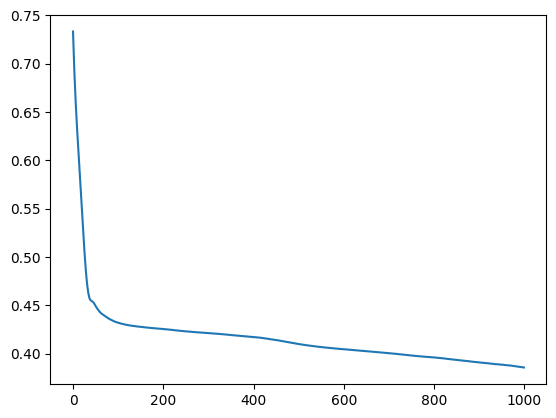

In [15]:
plt.plot(hist)
plt.show()

### 6) confusion matrix 와 heat map 그리시요   

In [16]:
train_y_pred = (model( torch.FloatTensor(x_train)) > 0.5) + 0
train_y_pred

forward call


tensor([[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],

In [17]:
train_y_true = y_train
train_y_true

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
    

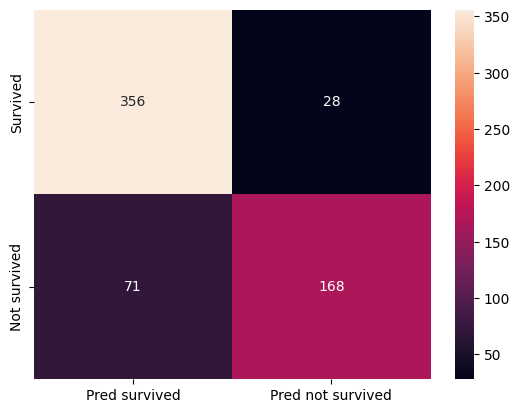

In [18]:
train_con_mat = confusion_matrix(train_y_true, train_y_pred)
sb.heatmap(train_con_mat, annot=True, fmt='d',
          xticklabels=['Pred survived', 'Pred not survived'], yticklabels=['Survived', 'Not survived'])
plt.show()

In [19]:
test_y_pred = (model( torch.FloatTensor(x_test)) > 0.5) + 0
test_y_pred

forward call


tensor([[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],

In [20]:
test_y_true = y_test
test_y_true

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

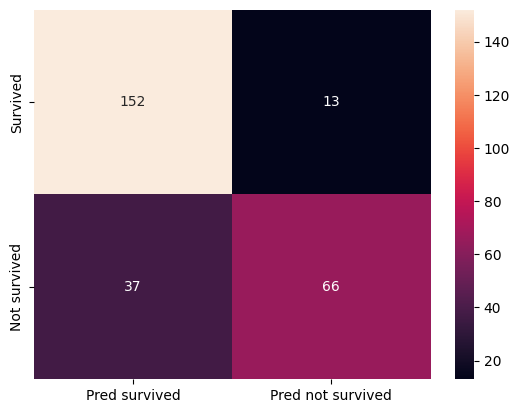

In [21]:
test_con_mat = confusion_matrix(test_y_true, test_y_pred)
sb.heatmap(test_con_mat, annot=True, fmt='d', 
           xticklabels=['Pred survived', 'Pred not survived'], yticklabels=['Survived', 'Not survived'])
plt.show()

### 7) train, test set f1 score 를 구하시요

In [22]:
f1_score(train_y_true, train_y_pred)

0.7724137931034482

In [23]:
f1_score(test_y_true, test_y_pred)

0.7252747252747253

### 8) 1등급, 여성, 32세, 65달러인경우 생존여부를 예측하시요 

In [24]:
p = (model( torch.FloatTensor([[1, 1, 32, 65]])) > 0.5) + 0

print("1등급, 여성, 32세, 65달러인경우 생존여부 예측")
if p == 1:
    print('Survived')
else:
    print('Not survived')

forward call
1등급, 여성, 32세, 65달러인경우 생존여부 예측
Survived
